In [19]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
import dabest_jck
import itertools
import NLCLIMB 
import NLGRAPHS
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout
from scipy.optimize import curve_fit

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
#initial file processing

computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
computer3 = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"

openPath = computer2 + filedir

# openPath = "C:\\Users\\User\\ACC Lab Dropbox\\ACC Lab\\Zhiyi\\NL's amended data\\Compilation\\"
files = os.listdir(openPath)

#identifying genotypes
responder = "Chrimson2"
driver = "SS77383"
wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.generation(exptdf, driver)
dfwt = NLCLIMB.generation(wtdf, wt)

C:\Users\lnico\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\SS77383 x Chrimson2.csv
C:\Users\lnico\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_SS77383 x Chrimson2.csv


In [25]:
def counterfall(df_rr1, nnumber, nnumberwt, phase): #phase is either "wt" or "expt"
    
    df_rr1['integer'] = df_rr1['value'].astype(int)
    count_wtfull = df_rr1[(df_rr1["Type"] == phase)]['integer'].value_counts()
    count_wtfull = count_wtfull.rename_axis('integer').reset_index(name='counts')

    if phase == "WT":
        dvis = nnumberwt
    else:
        dvis = nnumber
    count_wtfull['counts'] = (count_wtfull['counts']/dvis)*100
    
    listofval = [x for x in [float(x) for x in range(0,23)] if x not in set(count_wtfull['integer'])]
    count_wtfull = pd.concat([count_wtfull, pd.DataFrame({"integer" :listofval})], ignore_index = True)

    count_wtfull = count_wtfull.sort_values(by=['integer']).reset_index(drop = True)
    count_wtfull['counts'] = count_wtfull['counts'].replace(np.nan, 0)
    count_wtfull['name'] = phase
    
    return count_wtfull

def removingextraline(df1):
    df = df1.reset_index(drop=True)
    df['Seconds'] = round(df['Seconds'],1)
    line = df[(df['Seconds'] > 22.0)].index
    df = df.drop(line)
    
    return df

# **TOTAL calculations for graphs**



In [26]:
#Y position
df_de = NLMATH.calcgraph(dfexpt,"Y.*")
df_meande=NLMATH.meangraph(df_de)
df_dw = NLMATH.calcgraph(dfwt,"Y.*")
df_meandw=NLMATH.meangraph(df_dw)

#speed
df_se = NLMATH.calcgraph(dfexpt, "Velocity.*")
df_meanse = NLMATH.meangraph(df_se)
df_sw = NLMATH.calcgraph(dfwt, "Velocity.*")
df_meansw = NLMATH.meangraph(df_sw)

#Falling
df_fed = NLMATH.fallcalc(dfexpt, "Dark")
df_fel = NLMATH.fallcalc(dfexpt, "Full")
df_fer = NLMATH.fallcalc(dfexpt, "Recovery")

df_fwd = NLMATH.fallcalc(dfwt, "Dark")
df_fwl = NLMATH.fallcalc(dfwt, "Full")
df_fwr = NLMATH.fallcalc(dfwt, "Recovery")

#Falling
df_re = NLMATH.rastergraph(dfexpt)
df_rw = NLMATH.rastergraph(dfwt)
df_re['Type'] = "EXPT"
df_rw['Type'] = "WT"

df_rrdark = pd.concat([df_re[(df_re['ExperimentState']== 'Dark')], df_rw[(df_rw['ExperimentState']== 'Dark')]]).reset_index(drop=True)
#df_rr['list']= range(1,len(df_rr)+1)
df_rrfull = pd.concat([df_re[(df_re['ExperimentState']== 'Full')], df_rw[(df_rw['ExperimentState']== 'Full')]]).reset_index(drop=True)
#df_rr1['list']= range(1,len(df_rr1)+1)
df_rrrec = pd.concat([df_re[(df_re['ExperimentState']== 'Recovery')], df_rw[(df_rw['ExperimentState']== 'Recovery')]]).reset_index(drop=True)

## matplotlib version

C:\Users\lnico\AppData\Local\Temp\ipykernel_16160\3940912329.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figfirstplot.show()


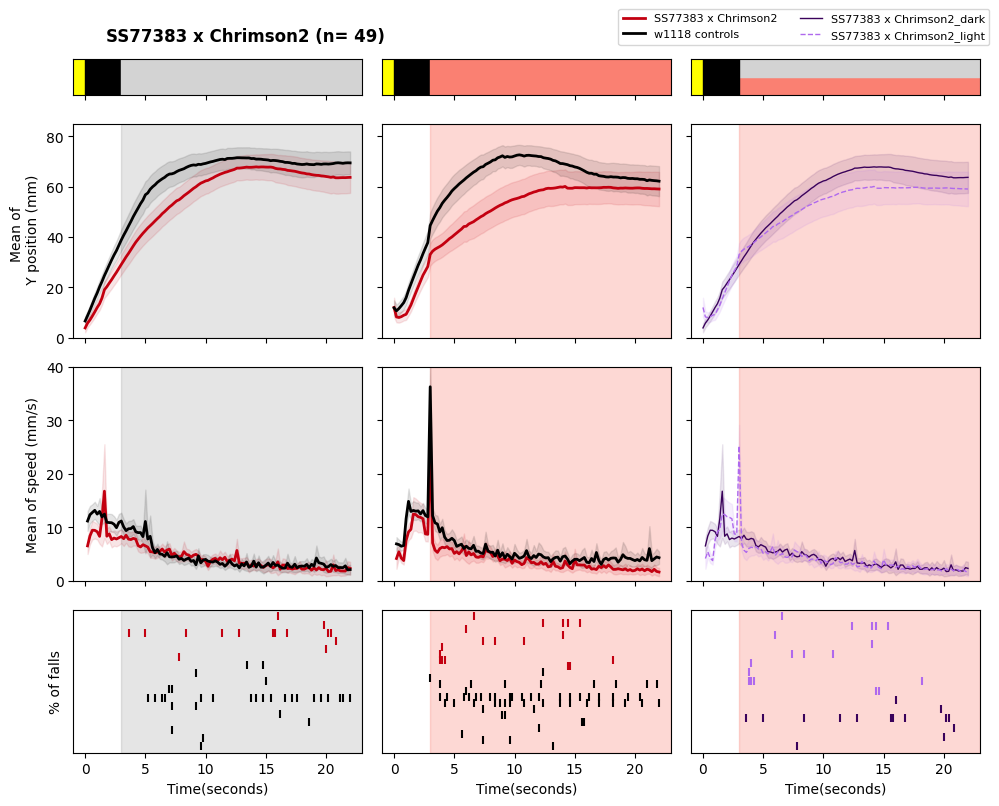

In [27]:

import matplotlib.patches as patches
figfirstplot, axs = plt.subplots(4, 3, figsize=(10, 8 ),sharex = "col", gridspec_kw={'height_ratios': [1,6,6,4]}) #sharey = row


df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)


driver = transgenic
nnumber = int(0.20*(len(dfexpt.columns)-2))
nnumberwt = int(0.20*(len(dfwt.columns)-2))
time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']


if "ACR" in responder:
    barcolr = "#1f9c19"
    patchcolor = "#c5e384"
    compdark = "#73440f"
    complight = "#de841f"
    
    
if "Chrimson2" in responder:
    barcolr = "#c30010"
    patchcolor = "salmon"
    compdark = "#3A025B"
    complight = "#AF69ED"

#df3 = expt
#df4 = wt

#cartoon
axs[0,0].axvspan(-1,0, color = "#FFFF00", label = "_nolegend_")
axs[0,0].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,0].axvspan(3,23, color = "lightgray" , label = "_nolegend_")

axs[0,1].axvspan(-1,0, color = "#FFFF00" , label = "_nolegend_")
axs[0,1].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,1].axvspan(3,23, color = patchcolor, label = "_nolegend_")

axs[0,2].axvspan(-1,0, color = "#FFFF00" , zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(0,3, color = "#000000", zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(3,23, color = patchcolor, label = "_nolegend_")
axs[0,2].axhline(y=0.75, color='lightgray', linewidth =14, zorder = 1, label = "_nolegend_" )

axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[0,2].get_yaxis().set_visible(False)

#y pos    

axs[1,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")

axs[1,0].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = "driver")
axs[1,0].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1, 0].plot(time, df4.loc[df4.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[1,0].fill_between(time, (df4.loc[df4.ExperimentState == "Dark", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI']), 
                      df4.loc[df4.ExperimentState == "Dark", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[1,0].set(xlabel='Time(seconds)', ylabel='Mean of \n Y position (mm)')
axs[1,1].set(xlabel='Time(seconds)')


axs[1,1].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,1].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2, label = "_nolegend_")
axs[1,1].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1,1].plot(time, df4.loc[df4.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2, label = "_nolegend_")
axs[1,1].fill_between(time, (df4.loc[df4.ExperimentState == "Full", 'mean']-df4.loc[df4.ExperimentState == "Full", 'CI']), 
                      df4.loc[df4.ExperimentState == "Full", 'mean']+df4.loc[df4.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")

#expt comaparison

axs[1,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = compdark, linewidth = 1, label = "driver" + "_dark")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= compdark, alpha=.1, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")


axs[1,0].set_ylim([0, 85])
axs[1,1].set_ylim([0, 85])
axs[1,2].set_ylim([0, 85])

#speed
time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']

axs[2,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[2,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[2,0].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = driver)
axs[2,0].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1,  label = "_nolegend_")
axs[2,0].plot(time, df6.loc[df6.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[2,0].fill_between(time, (df6.loc[df6.ExperimentState == "Dark", 'mean']-df6.loc[df6.ExperimentState == "Dark", 'CI']), 
                      df6.loc[df6.ExperimentState == "Dark", 'mean']+df6.loc[df6.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[2,0].set(xlabel='Time(seconds)', ylabel='Mean of speed (mm/s)')
axs[2,1].set(xlabel='Time(seconds)')



axs[2,1].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2)
axs[2,1].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1)
axs[2,1].plot(time, df6.loc[df6.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2)
axs[2,1].fill_between(time, (df6.loc[df6.ExperimentState == "Full", 'mean']-df6.loc[df6.ExperimentState == "Full", 'CI']), 
                      df6.loc[df6.ExperimentState == "Full", 'mean']+df6.loc[df6.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1)

#expt comaparison

axs[2,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[2,2].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = compdark, linewidth = 1,  label = "driver" + "_dark")
axs[2,2].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= compdark, alpha=.1, label = "_nolegend_")

axs[2,2].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[2,2].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")


axs[2,0].set_ylim([0, 40])
axs[2,1].set_ylim([0, 40])
axs[2,2].set_ylim([0, 40])

#raster
count_wtfull = df_rrfull[(df_rrfull["Type"] == "WT")]
count_exptfull = df_rrfull[(df_rrfull["Type"] == "EXPT")]
count_wtdark = df_rrdark[(df_rrdark["Type"] == "WT")]
count_exptdark = df_rrdark[(df_rrdark["Type"] == "EXPT")]

axs[3,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[3,1].axvspan(3,23, alpha=0.3, color = patchcolor)
axs[3,2].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[3,0].scatter(count_wtdark['value'], y= count_wtdark['variable'], s = 30, marker = "|", color = "#000000")
axs[3,0].scatter(count_exptdark['value'], y= count_exptdark['variable'], s = 30, marker = "|", color = barcolr)

axs[3,1].scatter(count_wtfull['value'], y= count_wtfull['variable'], s = 30, marker = "|", color = "#000000")
axs[3,1].scatter(count_exptfull['value'], y= count_exptfull['variable'], s = 30, marker = "|", color = barcolr)

#special measures
comp_dark = count_exptdark.copy()
comp_light = count_exptfull.copy()
comp_dark['special'] = "Dark_" +  comp_dark['variable']
comp_light['special'] = "ALight_" +  comp_light['variable']

axs[3,2].scatter(comp_dark['value'], y= comp_dark['special'], s = 30, marker = "|", color = compdark)
axs[3,2].scatter(comp_light['value'], y= comp_light['special'], s = 30, marker = "|", color = complight)


axs[3,0].set(xlabel='Time(seconds)', ylabel='% of falls')
axs[3,1].set(xlabel='Time(seconds)')
axs[3,2].set(xlabel='Time(seconds)')

axs[3,0].set_yticks([], minor=False)
axs[3,1].set_yticks([], minor=False)
axs[3,2].set_yticks([], minor=False)


#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-1,23])

    
figfirstplot.suptitle(t = driver  + " (n= " + str(nnumber) + ")", fontweight='bold', x = 0.25)

#legend
labels = [driver, "w1118 controls", driver +"_dark", driver + "_light"]

figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=2, bbox_transform=figfirstplot.transFigure, prop={'size': 8})

figfirstplot.tight_layout()

figfirstplot.show()

In [49]:
savelocation = openPath + "images\\"
fig.write_image(savelocation + "lineplot of " + transgenic +".jpg", scale=2)